# How to write neural networks for classification problem.
A classification problem is where you try to classify something as one thing or another!
Binary Classification
Muliticlass Classification 
Multilabel Classification 

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000 

X,Y = make_circles(n_samples, noise = 0.03, random_state = 42)
X[:10], Y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
#Our data is a little hard to understand right now, let's visualize it!!
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1],"label":Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


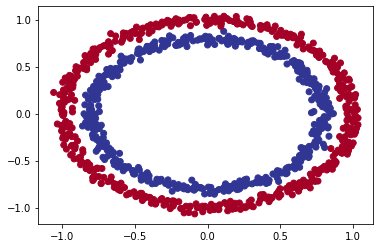

In [ ]:
#Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y, cmap =plt.cm.RdYlBu)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_1.compile(optimizer='adam',
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
model_1.fit(X,Y, epochs=200,verbose = 0)
model_1.evaluate(X,Y)

2/2 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
 import numpy as np 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(model=model_1, X=X, y=Y)

NameError: ignored

In [ ]:
#Lets create a regression data!!

tf.random.set_seed(42)
X_regression = tf.range(0,1000,5)
Y_regression = tf.range(100,1100,5)
X_regression, Y_regression

#Split the data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]

model_1.fit(tf.expand_dims(X_reg_train,axis = -1),Y_reg_train,epochs = 100,verbose=0)

ValueError: ignored

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_1.fit(tf.expand_dims(X_reg_train,axis=-1),Y_reg_train, epochs=200)
# model_1.evaluate(tf.expand_dims(X_reg_train,axis=-1),Y_reg_train)

Epoch 1/200
5/5 [==============================] - 1s 6ms/step - loss: 240.4465 - mae: 240.4465
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 90.6295 - mae: 90.6295
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 93.3837 - mae: 93.3837
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 58.9202 - mae: 58.9202
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 47.5485 - mae: 47.5485
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 56.1553 - mae: 56.1553
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 44.2802 - mae: 44.2802
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 42.1036 - mae: 42.1036
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 42.6294 - mae: 42.6294
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 42.3924 - mae: 42.3924
Epoch 11/200
5/5 [==============================] - 0s 4m

2/2 [==============================] - 0s 6ms/step


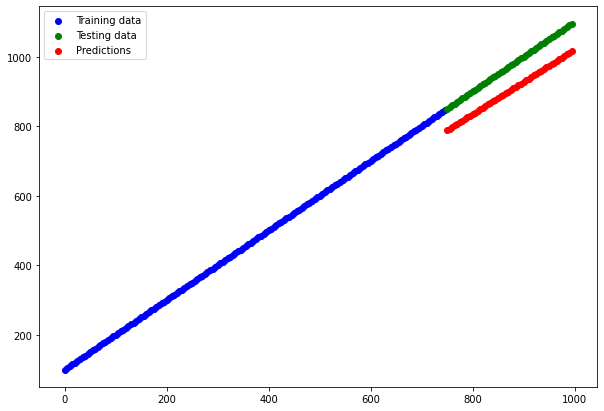

In [ ]:
#Make Predictions!!
Y_reg_pred = model_1.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, Y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, Y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, Y_reg_pred, c="r", label="Predictions")
plt.legend()

In [ ]:
#Building a non-linear model 

tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])

model_4.compile(optimizer='adam',
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
history = model_4.fit(X,Y,epochs = 200, verbose = 0)
model_4.evaluate(X,Y)


32/32 [==============================] - 0s 2ms/step - loss: 4.0772e-04 - accuracy: 1.0000


[0.0004077182966284454, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


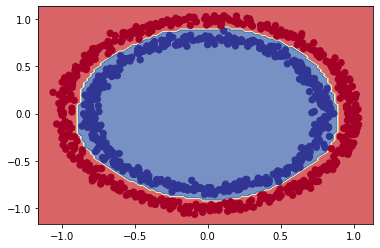

In [ ]:
plot_decision_boundary(model = model_4, X = X, y = Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_5.compile(optimizer='adam',
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_5.fit(X_train, Y_train, epochs = 100,callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

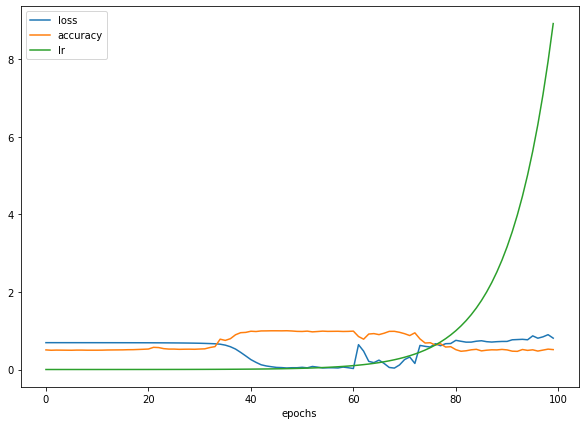

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Text(0, 0.5, 'Loss')

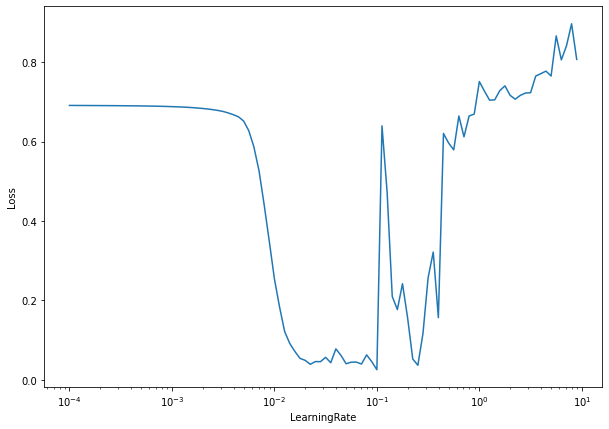

In [ ]:
lrs =  1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("LearningRate")
plt.ylabel("Loss")


In [ ]:
#Trying models with different learning rates!!!


# len(X_train), len(X_test)
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics=['accuracy'])

history = model_6.fit(X_train, Y_train, epochs=50)
model_6.evaluate(X_test, Y_test)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.7003 - accuracy: 0.4888
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5325
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6075
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.5962
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6212
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.6612
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7013
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.8062
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8263
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8413
Epoch 11/50
25/25 [

[0.0462980717420578, 0.9850000143051147]

In [ ]:
model_6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 4)                 12        
                                                                 
 dense_45 (Dense)            (None, 4)                 20        
                                                                 
 dense_46 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


#More classification evaluation methods!!
Accuracy 
Precision: higher precision leads to less false positives 
Recall : higher recall leads to less false negatives 
F1- score: 
Confusion matrix: 

In [ ]:
#Check the accuracy of our model 
loss, accuracy = model_6.evaluate(X_test, Y_test)
print(f"Loss: {loss}")
print(f"Accuracy:{accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9850
Loss: 0.0462980717420578
Accuracy:0.9850000143051147


In [ ]:
#Creating a confusion matrix

from sklearn.metrics import confusion_matrix

#Make predictions 
Y_preds = model_6.predict(X_test)

#Create confusion matrix
# confusion_matrix(Y_test,Y_preds) --> The prediction array (Y_preds) has come out in prediction probability!!!

7/7 [==============================] - 0s 2ms/step


In [ ]:
#Converting the prediction probabilities to binary format 
tf.round(Y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
 

In [ ]:
#Create confusion matric 
confusion_matrix(Y_test,tf.round(Y_preds))

array([[ 97,   3],
       [  0, 100]])

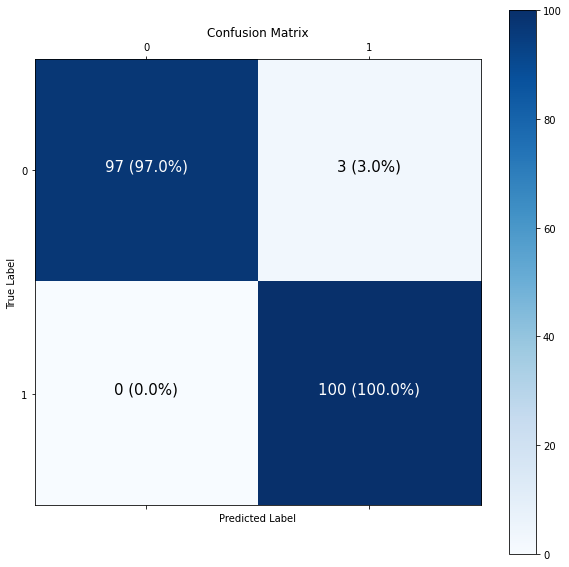

In [ ]:
#Making the confusion-matrix pretty

import itertools

figsize = (10,10)
cm = confusion_matrix(Y_test, tf.round(Y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] #normalize the confusion matrix 
# cm_norm
n_classes = cm.shape[0]
# n_classes

# Prettifying it!!
fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes 
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])
#Labeling the axis 
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#Set threshold for different colors 
threshold = (cm.max() + cm.min())/2

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

#Working with a larger example (Multi-class classification)
When you hve more than 2 classes as an option, it is known as a multi-class classification

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 

#THe data has already been sorted into training and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#Check the shaoe of a single example 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

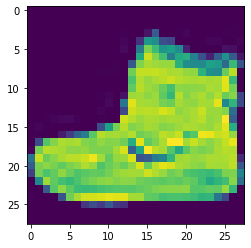

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
#Create a small list so we can index onto our training labels so they're human-readable 

class_names = ["T_shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle Boot"]


Text(0.5, 1.0, 'Trousers')

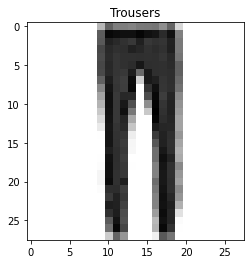

In [ ]:
plt.imshow(train_data[170], cmap=plt.cm.binary)
plt.title(class_names[train_labels[170]])

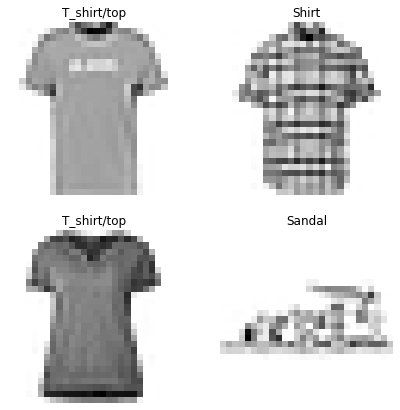

In [ ]:
#Plot mulitple random images of fashion mnist

import random 
plt.figure(figsize=(7,7))
for i in range(4):
  ax =plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
#Building a multi-class classification model 
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #Need to flatten the input data 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_7.fit(train_data,train_labels,epochs=5,validation_data=(test_data,test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3581 - accuracy: 0.0977 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2359 - accuracy: 0.1268 - val_loss: 2.0762 - val_accuracy: 0.1783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8245 - accuracy: 0.2349 - val_loss: 1.6941 - val_accuracy: 0.2865
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6423 - accuracy: 0.2897 - val_loss: 1.6034 - val_accuracy: 0.3158


In [ ]:
#Nueral networks prefer data to be scaled (normalization), this means they like to have numbers in tensors between 0 and 1
#We can normalize the data by dividing all the numbers in the dataset by dividing the numbers by the largest number!!
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Lets fit the model with the normalized data

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_8.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_8.fit(train_data_norm,train_labels, epochs=5, validation_data=(test_data_norm,test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4883 - accuracy: 0.4620 - val_loss: 1.2078 - val_accuracy: 0.6118
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0167 - accuracy: 0.6493 - val_loss: 0.9075 - val_accuracy: 0.6873
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8270 - accuracy: 0.7067 - val_loss: 0.7990 - val_accuracy: 0.7168
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7592 - accuracy: 0.7326 - val_loss: 0.7618 - val_accuracy: 0.7313
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7150 - accuracy: 0.7449 - val_loss: 0.7190 - val_accuracy: 0.7472


<AxesSubplot:title={'center':'Normalized data'}>

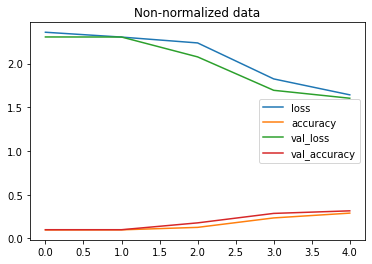

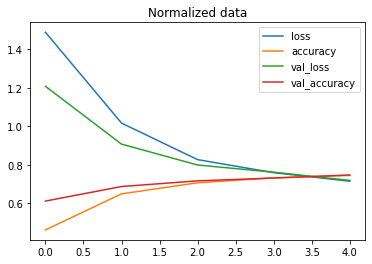

In [ ]:
import pandas as pd 
#Comparing the normalized and non-normalized data model!!
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

Finding the ideal learning rate - the one where the loss decreases the most!!


In [ ]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_9.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_9.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 63s 3ms/step - loss: 1.2440 - accuracy: 0.5655 - val_loss: 0.8631 - val_accuracy: 0.7299 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7250 - accuracy: 0.7601 - val_loss: 0.6870 - val_accuracy: 0.7599 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6230 - accuracy: 0.7806 - val_loss: 0.6267 - val_accuracy: 0.7755 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5805 - accuracy: 0.7970 - val_loss: 0.5942 - val_accuracy: 0.7921 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5579 - accuracy: 0.8076 - val_loss: 0.6242 - val_accuracy: 0.7849 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5435 - accuracy: 0.8127 - val_loss: 0.5921 - val_accuracy: 0.7936 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6

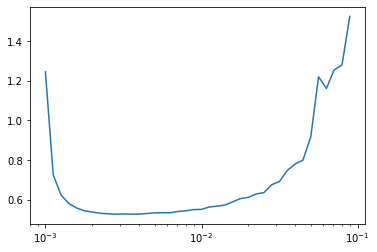

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])

In [ ]:
#Let's refit the model with the ideal learning rate 
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])
history_10 = model_10.fit(train_data_norm,train_labels,epochs=20,validation_data = (test_data_norm,test_labels))

NameError: ignored

#Evaluating our multi-class classification model 
To evaluate our multi-class classification model we could:
*Evaluate its performance using other classification metrics
*Asses some its predict
*Improve its results

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names


['T_shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
Y_probs = model_10.predict(test_data_norm)
Y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.1917418e-11, 1.9602103e-11, 3.9550401e-14, 1.0760269e-13,
        2.0707568e-16, 2.8707752e-02, 4.5633073e-14, 4.5781702e-02,
        8.4685709e-08, 9.2551041e-01],
       [1.3075377e-02, 1.6152479e-05, 4.6858051e-01, 3.8020010e-03,
        2.8422877e-01, 1.4932705e-03, 2.2446869e-01, 5.1718729e-04,
        3.5470501e-03, 2.7089362e-04],
       [1.0467251e-03, 9.9727452e-01, 2.6699807e-11, 1.6784345e-03,
        1.2725868e-10, 1.9657731e-09, 4.1045436e-07, 5.9191735e-22,
        2.6670918e-13, 6.7673783e-33],
       [3.9764831e-04, 9.9377537e-01, 1.6377557e-11, 5.8267382e-03,
        2.7756550e-10, 1.7524185e-09, 2.2748965e-07, 5.8553422e-21,
        4.6655657e-12, 1.3262151e-32],
       [2.4919853e-01, 2.1138038e-03, 1.5052092e-01, 2.9187856e-02,
        6.5962054e-02, 2.4139017e-03, 5.0041229e-01, 1.4439958e-06,
        1.8917555e-04, 2.1528873e-08]], dtype=float32)

In [ ]:
Y_probs[1], class_names[tf.argmax(Y_probs[1])]

(array([1.3075377e-02, 1.6152479e-05, 4.6858051e-01, 3.8020010e-03,
        2.8422877e-01, 1.4932705e-03, 2.2446869e-01, 5.1718729e-04,
        3.5470501e-03, 2.7089362e-04], dtype=float32), 'Pullover')

In [ ]:
#Creating a confusion matrix 
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_true=test_labels, 
#                  y_pred=Y_preds)
make_confusion_matrix(y_true=test_labels, 
                      y_pred=Y_probs,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

TypeError: ignored

In [ ]:
test_labels.shape,Y_probs.shape

((10000,), (10000, 10))

In [ ]:
#Visualize the data more for a better understanding 
import random
import matplotlib.pyplot as plt
def plot_random_image(model,images,true_labels,classes):
  #Set up a random integer 
  i = random.randint(0,len(images))
  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image 
  plt.imshow(target_image, cmap=plt.cm.binary)

  #change the color of the titles depending on whether the predictions are right or wrong

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  #Add xlabel information 
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),color=color)

In [ ]:
plot_random_image(model = model_10,images = test_data_norm,true_labels = test_labels,classes=class_names)

NameError: ignored

In [ ]:
#What patterns is our model learning 

model_10.layers


In [ ]:
#Get the patterns of a layer in our network
weights,biases = model_10.layers[1].get_weights()
weights,weights.shape

(array([[ 0.79259634, -0.54193807, -0.56949013, -0.8077723 ],
        [ 1.0812879 ,  0.09911548, -0.11673807, -0.28556368],
        [ 0.45590192, -0.16340347,  0.97923285, -1.0787514 ],
        ...,
        [-0.6623712 , -0.11864455, -0.5513248 , -0.2278705 ],
        [-0.19406947,  0.5982205 , -0.59626955, -0.1818839 ],
        [ 0.14674881,  0.11107579, -0.32708186, -0.24117944]],
       dtype=float32), (784, 4))

In [ ]:
biases

array([ 1.2102108, -1.7144632, -0.1996024,  1.6043324], dtype=float32)

In [ ]:
#Exercises!!!
# tf.random.set_seed(42)
from sklearn.datasets import make_moons

X,Y = make_moons(n_samples = 100,noise=0.1)

for i in X:
  if (i[0]<0.0):
    i[0] = i[0]*-1
  if (i[1]<0.0):
    i[1]= i[1]*-1
X

array([[1.99391929, 0.24327379],
       [1.40062337, 0.20251645],
       [2.10476395, 0.39683765],
       [0.2466508 , 0.92332062],
       [0.16453876, 1.04223641],
       [0.13370143, 0.33074271],
       [0.83772865, 0.04858591],
       [0.49664625, 0.33600104],
       [0.92707707, 0.15230413],
       [0.90548925, 0.35205008],
       [0.7914624 , 0.12351561],
       [0.12015124, 0.01458871],
       [0.55422843, 0.86708161],
       [1.64677905, 0.04753718],
       [0.49926054, 0.82279447],
       [0.21704629, 0.02908403],
       [1.05325861, 0.29080058],
       [1.87221408, 0.14128627],
       [0.8365788 , 0.30628257],
       [0.47070876, 0.19020623],
       [0.82797857, 0.37537213],
       [0.02841348, 0.58663566],
       [0.85839722, 0.370948  ],
       [0.61411048, 0.58847907],
       [0.56769238, 0.66577159],
       [0.19541324, 1.13801404],
       [1.83797638, 0.12857762],
       [0.58553426, 0.90272633],
       [1.07652971, 0.53992076],
       [0.40393153, 0.93324622],
       [0.

In [ ]:
X.min(),X.max()
X = X/X.max()
X.max(),X.min()

(1.0, 0.0035819913852215743)

In [ ]:

#Split the data in train and test!! 
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(X,Y,test_size=0.2,random_state=42)
len(train_data),len(train_labels),len(test_data),len(test_labels)

(80, 80, 20, 20)

In [ ]:
#Training the model!!

import tensorflow as tf
tf.random.set_seed(42)

model_ex = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_ex.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_ex.fit(train_data,train_labels,epochs=500,verbose=0)
model_ex.evaluate(test_data,test_labels)

1/1 [==============================] - 0s 213ms/step - loss: 0.4546 - accuracy: 0.9500


[0.4545799791812897, 0.949999988079071]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


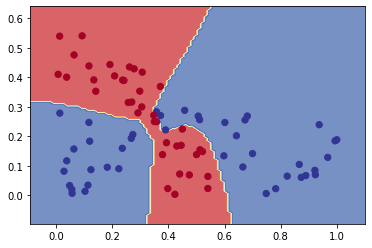

In [ ]:
plot_decision_boundary(model = model_ex, X = train_data, y = train_labels)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


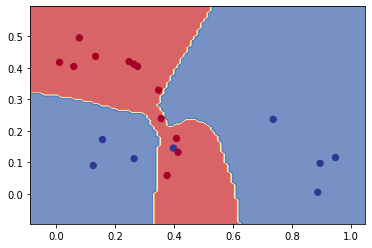

In [ ]:
plot_decision_boundary(model=model_ex,X=test_data,y=test_labels)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data[0], train_labels[0]
class_names

NameError: ignored

In [ ]:
#Normalize the data 



train_data = train_data/(train_data.max())
test_data = test_data/(test_data.max())

train_labels = train_labels/(train_labels.max())
test_labels = test_labels/(test_labels.max())

test_labels
# train_data.max(),test_data.max()

array([1.        , 0.22222222, 0.11111111, ..., 0.88888889, 0.11111111,
       0.55555556])

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_ex_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_ex_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

model_ex_2.fit(train_data,train_labels,epochs = 50)
model_ex_2.evaluate(test_data,test_labels)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6988 - accuracy: 0.2794
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5336 - accuracy: 0.3148
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4948 - accuracy: 0.3511
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4301 - accuracy: 0.4119
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3305 - accuracy: 0.4243
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2835 - accuracy: 0.4304
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2670 - accuracy: 0.4349
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2446 - accuracy: 0.4364
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2404 - accuracy: 0.4349
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.222

[0.9325711131095886, 0.646399974822998]

In [ ]:
def softmax(data):
  data = data.reshape(1, -1)
  return tf.exp(data)/tf.reduce_sum(tf.exp(data), 1)  


softmax(train_data)

<tf.Tensor: shape=(1, 47040000), dtype=float64, numpy=
array([[1.49433566e-08, 1.49433566e-08, 1.49433566e-08, ...,
        1.49433566e-08, 1.49433566e-08, 1.49433566e-08]])>

1/1 [==============================] - 0s 32ms/step


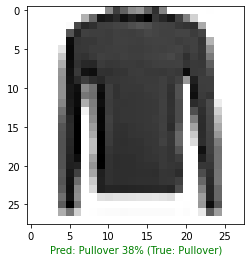

In [ ]:
plot_random_image(model = model_ex_2,images = test_data,true_labels = test_labels,classes = class_names)

In [ ]:
class_names

['T_shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
import matplotlib.pyplot as plt
def plot_random_image_me():
  i = random.randint(0,len(images))
  target_image = images[i]
  plt.imshow(target_image)